# Exercise 1: Load the Tips Dataset
- Import the necessary libraries (seaborn, matplotlib.pyplot, and pandas).
- Load the Tips dataset from Seaborn.

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import nbformat
warnings.filterwarnings('ignore')

In [86]:
df= sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


# Exercise 2: Scatter Plot

- Create a scatter plot using Seaborn to visualize the relationship between total_bill and tip.

- Add different colors for different days of the week.

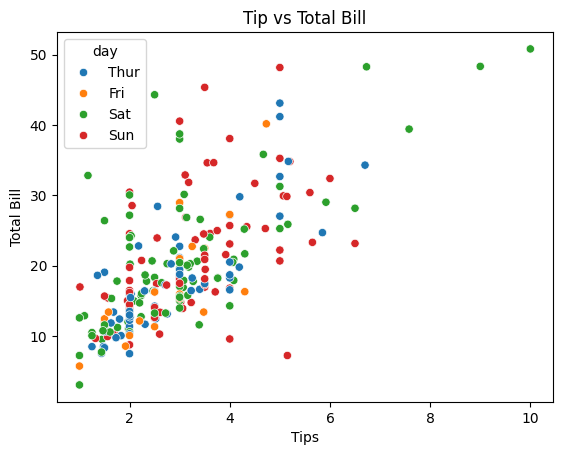

In [87]:
sns.scatterplot(x=df["tip"],y=df["total_bill"],hue=df["day"])
plt.title("Tip vs Total Bill")
plt.xlabel("Tips")
plt.ylabel("Total Bill")
plt.show()


# Exercise 3: Histogram
- Create a histogram of the total_bill column using Matplotlib.


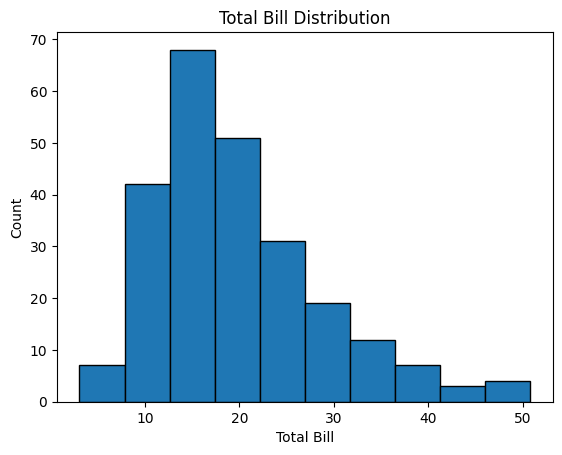

In [88]:
plt.hist(df["total_bill"],edgecolor="black")
plt.title("Total Bill Distribution")
plt.xlabel("Total Bill")
plt.ylabel("Count")
plt.show ()

# Exercise 4: Heatmap
- Create a heatmap of the correlation matrix of the numerical columns in the Tips dataset using Seaborn.

            total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000


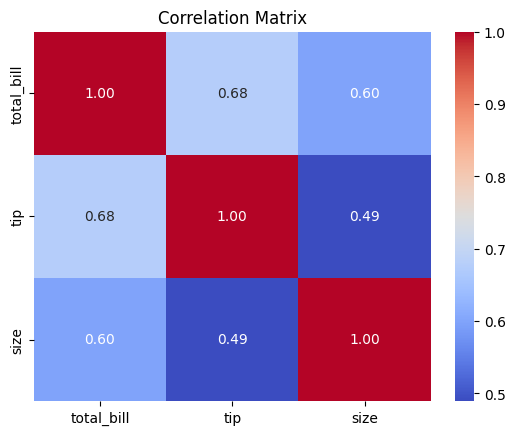

In [89]:
correlation=df.corr(numeric_only=True)
print(correlation)
sns.heatmap(correlation,annot=True,fmt=".2f",cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()

# Exercise 5: Bar Plot
- Create a bar plot to show the average tip amount for each day using Seaborn.

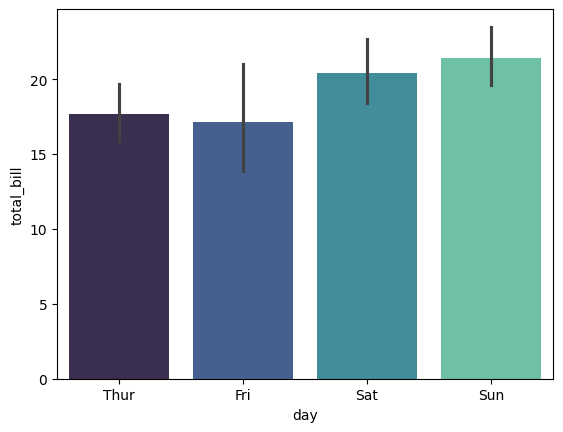

In [90]:
sns.barplot(x=df["day"],y=df["total_bill"],ci=95,data=df,palette="mako")
plt.show()

# Exercise 6: Line Plot
- Create a line plot to show the trend of tip amount over total_bill using Matplotlib.

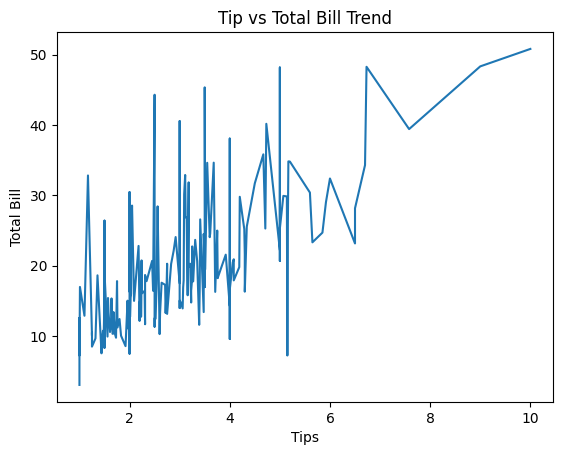

In [91]:
df_sorted=df.sort_values(by="tip")
plt.plot(df_sorted["tip"],df_sorted["total_bill"])
plt.title("Tip vs Total Bill Trend")
plt.xlabel("Tips")
plt.ylabel("Total Bill")
plt.show()

# Exercise 7: Scatter Plots with Subplots
- Create a figure with two subplots (1 row, 2 columns).
- In the first subplot, create a scatter plot of total_bill vs tip.
- In the second subplot, create a scatter plot of total_bill vs size.

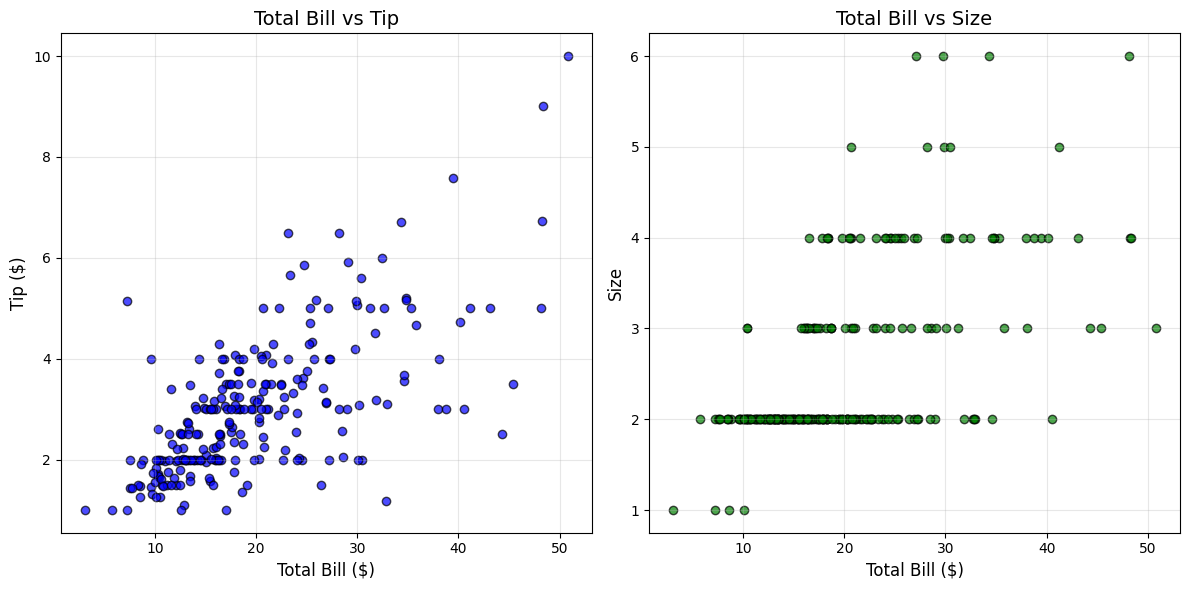

In [92]:
# Create a figure with 1 row and 2 columns of subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6), sharey=False)

# First subplot: Scatter plot of total_bill vs tip
axes[0].scatter(df['total_bill'], df['tip'], alpha=0.7, c='blue', edgecolor='k')
axes[0].set_title('Total Bill vs Tip', fontsize=14)
axes[0].set_xlabel('Total Bill ($)', fontsize=12)
axes[0].set_ylabel('Tip ($)', fontsize=12)
axes[0].grid(alpha=0.3)

# Second subplot: Scatter plot of total_bill vs size
axes[1].scatter(df['total_bill'], df['size'], alpha=0.7, c='green', edgecolor='k')
axes[1].set_title('Total Bill vs Size', fontsize=14)
axes[1].set_xlabel('Total Bill ($)', fontsize=12)
axes[1].set_ylabel('Size', fontsize=12)
axes[1].grid(alpha=0.3)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Exercise 8: 2x2 Grid of Subplot
- Plot the following in each subplot:
- (1, 1): Scatter plot of total_bill vs tip
- (1, 2): Histogram of total_bill
- (2, 1): Box plot of total_bill by day
- (2, 2): lineplot plot of total_bill vs tip

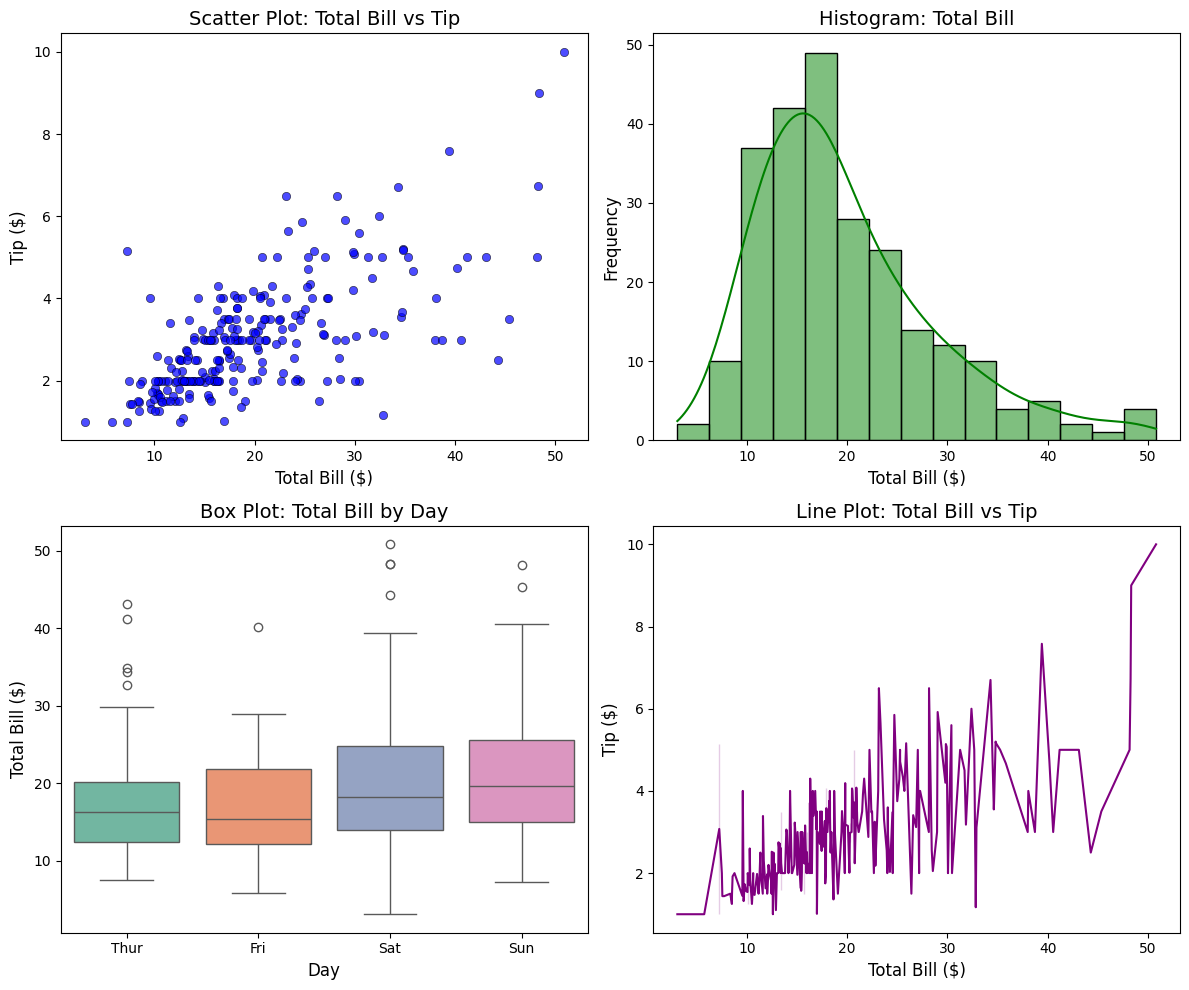

In [93]:
# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# (1, 1): Scatter plot of total_bill vs tip
sns.scatterplot(x='total_bill', y='tip', data=df, ax=axes[0, 0], color='blue', alpha=0.7, edgecolor='k')
axes[0, 0].set_title('Scatter Plot: Total Bill vs Tip', fontsize=14)
axes[0, 0].set_xlabel('Total Bill ($)', fontsize=12)
axes[0, 0].set_ylabel('Tip ($)', fontsize=12)

# (1, 2): Histogram of total_bill
sns.histplot(df['total_bill'], bins=15, kde=True, color='green', ax=axes[0, 1])
axes[0, 1].set_title('Histogram: Total Bill', fontsize=14)
axes[0, 1].set_xlabel('Total Bill ($)', fontsize=12)
axes[0, 1].set_ylabel('Frequency', fontsize=12)

# (2, 1): Box plot of total_bill by day
sns.boxplot(x='day', y='total_bill', data=df, ax=axes[1, 0], palette='Set2')
axes[1, 0].set_title('Box Plot: Total Bill by Day', fontsize=14)
axes[1, 0].set_xlabel('Day', fontsize=12)
axes[1, 0].set_ylabel('Total Bill ($)', fontsize=12)

# (2, 2): Line plot of total_bill vs tip
sns.lineplot(x='total_bill', y='tip', data=df, ax=axes[1, 1], color='purple')
axes[1, 1].set_title('Line Plot: Total Bill vs Tip', fontsize=14)
axes[1, 1].set_xlabel('Total Bill ($)', fontsize=12)
axes[1, 1].set_ylabel('Tip ($)', fontsize=12)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()


# Exercise 9: Customizing Subplot:
- Plot the following in each subplot:
- (1, 1): Line plot of total_bill vs tip
- (2, 1): Bar plot of the average tip amount for each day
- (3, 1): Heatmap of the correlation matrix


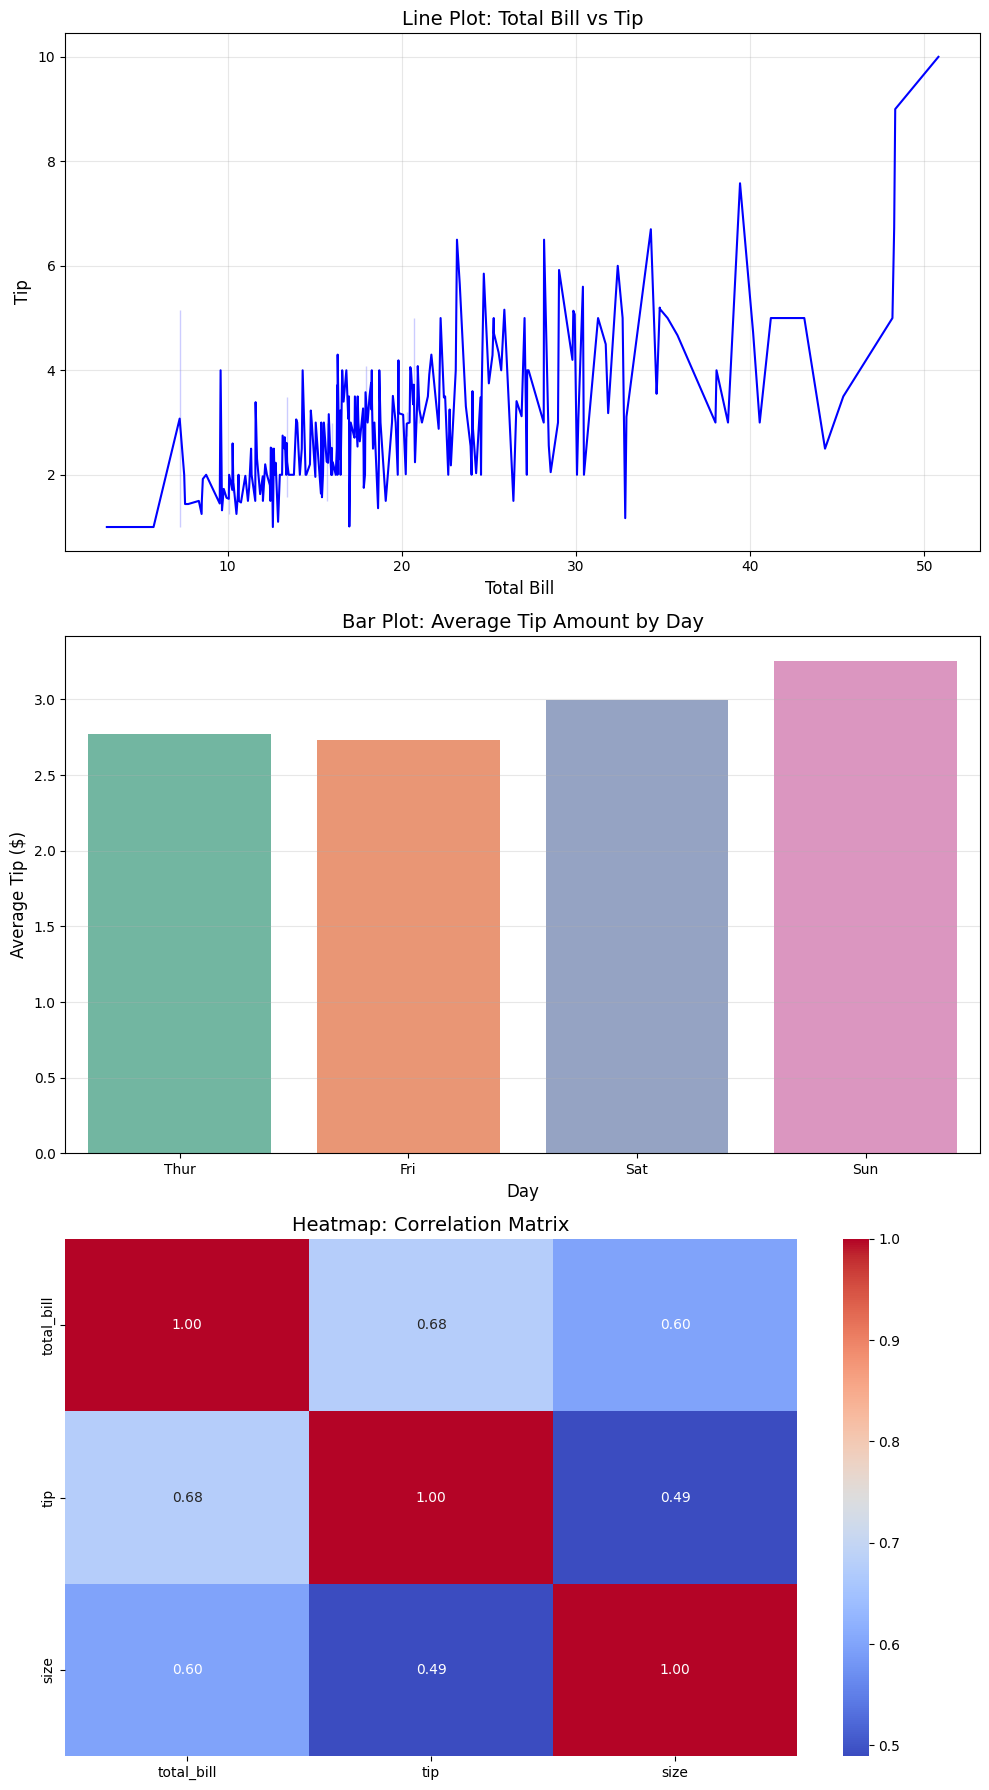

In [98]:
# Compute the correlation matrix for the heatmap
numeric_tips = df.select_dtypes(include='number')
correlation_matrix = df.corr(numeric_only=True)

# Create a 3x1 grid of subplots
fig, axes = plt.subplots(3, 1, figsize=(10, 18))

# (1, 1): Line plot of total_bill vs tip
sns.lineplot(x='total_bill', y='tip', data=df, ax=axes[0], color='blue')
axes[0].set_title('Line Plot: Total Bill vs Tip', fontsize=14)
axes[0].set_xlabel('Total Bill ', fontsize=12)
axes[0].set_ylabel('Tip', fontsize=12)
axes[0].grid(alpha=0.3)

# (2, 1): Bar plot of the average tip amount for each day
sns.barplot(x='day', y='tip', data=df, ax=axes[1], palette='Set2', ci=None)
axes[1].set_title('Bar Plot: Average Tip Amount by Day', fontsize=14)
axes[1].set_xlabel('Day', fontsize=12)
axes[1].set_ylabel('Average Tip ($)', fontsize=12)
axes[1].grid(axis='y', alpha=0.3)

# (3, 1): Heatmap of the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', ax=axes[2])
axes[2].set_title('Heatmap: Correlation Matrix', fontsize=14)

# Adjust layout and display the plots
plt.tight_layout()
plt.show()